# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [162]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [163]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [164]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [165]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [166]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [167]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [168]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [169]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

### Merge the DataFrames

In [170]:

# Create Urban cities DF
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [171]:
# Create Suburban DF
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,2019-04-07 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,2019-01-17 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2019-02-27 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,2019-04-19 1:06,37.78,2.273050e+12,12,Suburban


In [172]:
#Rural Df
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4.018030e+12,2,Rural


In [173]:
# Combine the data into a single data set
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the data table for preview
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

## Deliverable 1: Get a Summary DataFrame


In [174]:
#1. Get the total rides for each city type.groupby/count
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [175]:
# 2. Get the total drivers for each city type.groupby/sum
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [176]:
#  3. Get the total amount of fares for each city type.groupby/sum
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [177]:
#  4. Get the average fare per ride for each city type.sum/total rides
avg_fares_per_ride_by_city_type = total_fares_by_city_type / total_rides_by_city_type
avg_fares_per_ride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [178]:
#  5. Get the average fare per driver per each city type.
fare_per_driver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type
fare_per_driver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [179]:
# 6. Create a PyBer summary DataFrame.
summary_df = pd.DataFrame()

summary_df["Total Rides"] = total_rides_by_city_type
summary_df["Total Drivers"] = total_drivers_by_city_type
summary_df["Total Fares"] = total_fares_by_city_type
summary_df["Average Fare per Ride"] = avg_fares_per_ride_by_city_type
summary_df["Average Fare per Driver"] = fare_per_driver_by_city_type

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [180]:
#  7. Cleaning up the DataFrame. Delete the index name-type,snippet!!!!
summary_df.index.name = None


In [181]:
#  8. Format the columns.
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [182]:
# 1. Read the merged DataFrame-groupby() type/date of pyber then sum
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [183]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_dates_count = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
type_dates_count

date              type    
2019-01-01 0:08   Urban       37.91
2019-01-01 0:46   Suburban    47.74
2019-01-01 12:32  Suburban    25.56
2019-01-01 14:40  Urban        5.42
2019-01-01 14:42  Urban       12.31
                              ...  
2019-05-08 1:54   Urban       32.69
2019-05-08 2:31   Urban       41.33
2019-05-08 4:20   Urban       21.99
2019-05-08 4:39   Urban       18.45
2019-05-08 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [184]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use in the 'pivot()' function.
# df = df.reset_index()
type_dates_count = type_dates_count.reset_index()
type_dates_count

,date,type,fare
0,2019-01-01 0:08,Urban,37.91
1,2019-01-01 0:46,Suburban,47.74
2,2019-01-01 12:32,Suburban,25.56
3,2019-01-01 14:40,Urban,5.42
4,2019-01-01 14:42,Urban,12.31
...,...,...,...
2359,2019-05-08 1:54,Urban,32.69
2360,2019-05-08 2:31,Urban,41.33
2361,2019-05-08 4:20,Urban,21.99
2362,2019-05-08 4:39,Urban,18.45


In [185]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_table = pd.pivot_table(type_dates_count, values='fare', index = 'date', columns ='type')
pyber_pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
2019-01-01 14:52,NaN,31.15,NaN
2019-01-01 17:22,NaN,NaN,42.11
2019-01-01 21:04,NaN,NaN,11.71
2019-01-01 2:07,NaN,24.07,NaN


In [186]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
loc_pyber_pivottable = pyber_pivot_table.loc['2019-01-01':'2019-04-29']
loc_pyber_pivottable.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
2019-01-01 14:52,NaN,31.15,NaN
2019-01-01 17:22,NaN,NaN,42.11
2019-01-01 21:04,NaN,NaN,11.71
2019-01-01 2:07,NaN,24.07,NaN


In [187]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
loc_pyber_pivottable.index = pd.to_datetime(loc_pyber_pivottable.index)

In [188]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_pyber_pivottable.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [189]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
loc_pyber_pivottable_res=loc_pyber_pivottable.resample('W').sum()
loc_pyber_pivottable_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [190]:
loc_pyber_pivottable_res.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


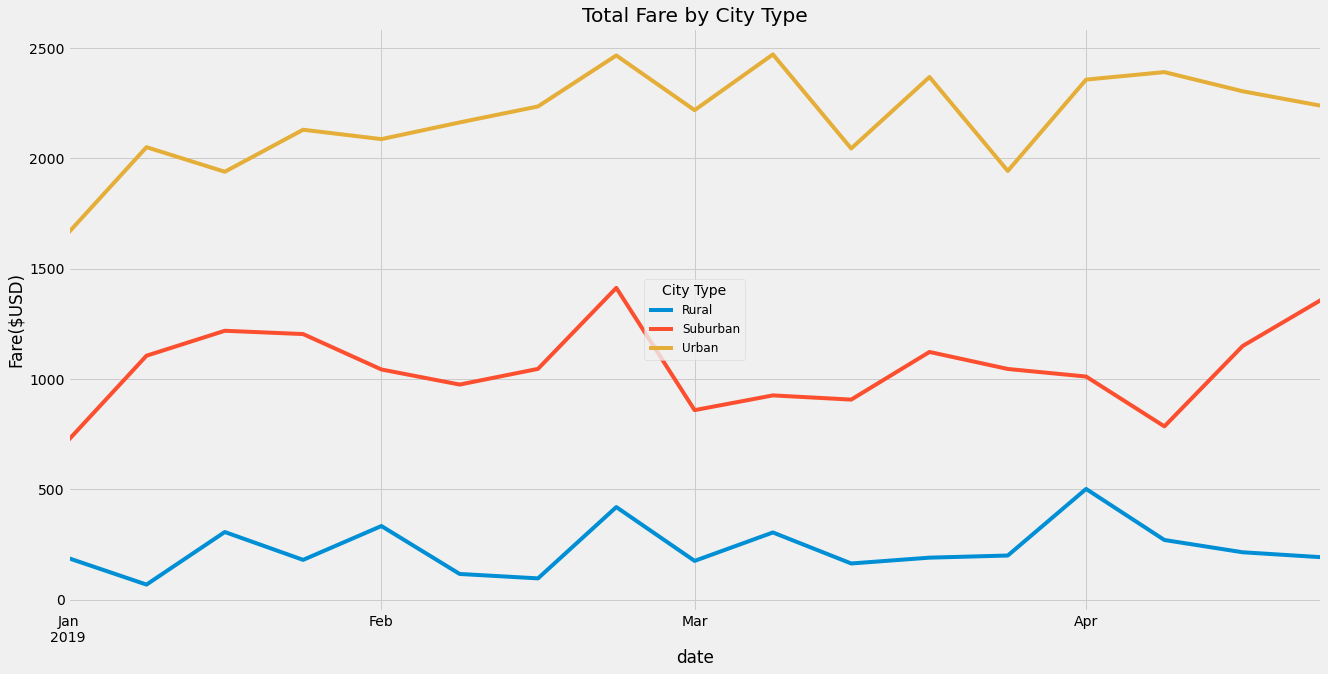

In [191]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
#style.use('fivethirtyeight')
style.use('fivethirtyeight')

loc_pyber_pivottable_res.plot(figsize=(20,10))
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")
legend = plt.legend(fontsize="12"
             , scatterpoints=1 
             , loc="center"  
             , title="City Type")
